In [1]:
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

distributed 1.21.8 requires msgpack, which is not installed.
twisted 21.2.0 has requirement attrs>=19.2.0, but you'll have attrs 18.1.0 which is incompatible.
cryptography 3.4.4 has requirement cffi>=1.12, but you'll have cffi 1.11.5 which is incompatible.
automat 20.2.0 has requirement attrs>=19.2.0, but you'll have attrs 18.1.0 which is incompatible.
You are using pip version 10.0.1, however version 21.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Import Libraries

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import time

import numpy as np # library to handle data in a vectorized manner

    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import matplotlib as mpl
import matplotlib.pyplot as plt

import re


In [3]:
url = "https://www.dasoertliche.de/Themen/Postleitzahlen/M%C3%BCnchen.html"
time.sleep(1)
print(url)

https://www.dasoertliche.de/Themen/Postleitzahlen/M%C3%BCnchen.html


# Download the Dataframe and convert to Pandas

In [4]:
Munich_ZIP = pd.DataFrame(columns=["City", "Neighborhood","Postalcode"])
Munich_ZIP.drop(Munich_ZIP.index, inplace=True)

url = "https://www.dasoertliche.de/Themen/Postleitzahlen/M%C3%BCnchen.html"

data  = requests.get(url).text 
r=requests.get(url)
c=r.content
soup = BeautifulSoup(c, 'html.parser')

title_box = soup.find('table')
title = title_box.get_text(separator=" ").strip()
type(title)
res = bytes(title, 'utf-8')
soup2 = BeautifulSoup(res, 'html.parser')

for row in soup.find_all("table")[0].find_all("tr"):  

    col = row.find_all("td")
    try:
        City = col[1].text
    except:
        pass
    
    try:
        #Neighborhood = col[2].text.replace('\n',' ').split(' ')
        #Neighborhood = col[2].replace("<br>", " ")
        Neighborhood = col[2].get_text(separator=" ").strip()
    except:
        pass
    
    try:
        Postalcode = col[0].text
    except:
        pass
    
    try:
        Munich_ZIP = Munich_ZIP.append({"City":City,"Neighborhood":Neighborhood, "Postalcode":Postalcode}, ignore_index=True)
    except:
        pass
    
Munich_ZIP=Munich_ZIP[Munich_ZIP.City == 'München']

Munich_ZIP=Munich_ZIP.drop(columns=["City"])

Munich_ZIP


Neighborhood Postalcode
0         Altstadt Isarvorstadt Lehel Ludwigsvorstadt      80331
1                 Altstadt Maxvorstadt Schwabing-West      80333
2      Altstadt Ludwigsvorstadt Maxvorstadt Neuhausen      80335
3      Altstadt Isarvorstadt Ludwigsvorstadt Sendling      80336
4               Isarvorstadt Ludwigsvorstadt Sendling      80337
5                    Ludwigsvorstadt Schwanthalerhöhe      80339
6                               Altstadt Isarvorstadt      80469
7   Bogenhausen Haidhausen Isarvorstadt Lehel Schw...      80538
8                Altstadt Lehel Maxvorstadt Schwabing      80539
9                                           Neuhausen      80634
10                              Maxvorstadt Neuhausen      80636
11                    Milbertshofen Moosach Neuhausen      80637
12                      Moosach Neuhausen Nymphenburg      80638
13                         Laim Neuhausen Nymphenburg      80639
14                             Laim Sendling-Westpark      80686
15                                        Laim Pasing      80687
16                                 Hadern Laim Pasing      80689
17                                     Schwabing-West      80796
18  Maxvorstadt Milbertshofen Neuhausen Schwabing-...      80797
19                         Maxvorstadt Schwabing-West      80798
20               Maxvorstadt Schwabing Schwabing-West      80799
21                           Schwabing Schwabing-West      80801
22                              Maxvorstadt Schwabing      80802
23                           Schwabing Schwabing-West      80803
24                           Schwabing Schwabing-West      80804
25                              Bogenhausen Schwabing      80805
26  Freimann Milbertshofen Schwabing Schwabing-Fre...      80807
27             Milbertshofen Neuhausen Schwabing-West      80809
28                     Am Hart Feldmoching Hasenbergl      80933
29                                 Am Hart Hasenbergl      80935
..                                                ...        ...
44                         Sendling Sendling-Westpark      81373
45                                             Hadern      81375
46                           Hadern Sendling-Westpark      81377
47  Obersendling Sendling Sendling-Westpark Thalki...      81379
48                                 Fürstenried Hadern      81475
49                                  Forstenried Solln      81476
50                     Forstenried Obersendling Solln      81477
51                     Obersendling Solln Thalkirchen      81479
52                Obergiesing Ramersdorf Untergiesing      81539
53               Au Haidhausen Obergiesing Ramersdorf      81541
54                                    Au Untergiesing      81543
55                            Harlaching Untergiesing      81545
56                Harlaching Obergiesing Untergiesing      81547
57          Harlaching Obergiesing Perlach Ramersdorf      81549
58                                         Haidhausen      81667
59                           Au Haidhausen Ramersdorf      81669
60                            Berg am Laim Ramersdorf      81671
61                                       Berg am Laim      81673
62                             Bogenhausen Haidhausen      81675
63      Berg am Laim Bogenhausen Haidhausen Trudering      81677
64                                        Bogenhausen      81679
65          Berg am Laim Perlach Ramersdorf Trudering      81735
66                                 Perlach Ramersdorf      81737
67                         Perlach Ramersdorf-Perlach      81739
68                             Berg am Laim Trudering      81825
69                                  Perlach Trudering      81827
70                        Berg am Laim Riem Trudering      81829
71                                        Bogenhausen      81925
72                                        Bogenhausen      81927
73                                   Bogenhausen Riem      81929

[74 rows x

In [5]:
# Test Geocoder

In [6]:
address = " Perlach"

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 48.1000997, 11.6306502.


In [7]:
import geopy
from  geopy.geocoders import Nominatim
nominatim_service = Nominatim(user_agent='X@yy.com') # Important line
geopy.geocoders.options.default_user_agent = "X@yy.com" # Important line
geolocator = Nominatim()

In [8]:
city ="Toronto"
country ="Canada"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)


latitude is :- 43.6534817 
longtitude is:- -79.3839347


In [9]:
location = geolocator.geocode("Toronto, North York, Parkwoods")
print(location.address)
print('')
print((location.latitude, location.longitude))
print('')
print(location.raw)


(43.7587999, -79.3201966)

{'place_id': 124974741, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 160406961, 'boundingbox': ['43.7576231', '43.761106', '-79.3239088', '-79.316215'], 'lat': '43.7587999', 'lon': '-79.3201966', 'display_name': 'Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 2X2, Canada', 'class': 'highway', 'type': 'secondary', 'importance': 0.51}

Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 1Z5, Canada

(43.7611243, -79.3240594)

{'place_id': 126470817, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 160406962, 'boundingbox': ['43.761106', '43.7612191', '-79.3242996', '-79.3239088'], 'lat': '43.7611243', 'lon': '-79.3240594', 'display_name': 'Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 1Z5, Canada', 'class': 'highway', 'type': 'secondary', 'importance': 0.51}


{'place_id': 124974741,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 160406961,
 'boundingbox': ['43.7576231', '43.761106', '-79.3239088', '-79.316215'],
 'lat': '43.7587999',
 'lon': '-79.3201966',
 'display_name': 'Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 2X2, Canada',
 'class': 'highway',
 'type': 'secondary',
 'importance': 0.51}

# Get the Geodata for the Dataset

In [10]:
locator = Nominatim(user_agent="KapilsGeocoder")
location = locator.geocode("Munich, Germany")
from geopy.extra.rate_limiter import RateLimiter
# PostalCode  Borough  Neighborhood
df_temp=Munich_ZIP.copy()
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df_temp['Address'] = df_temp['Postalcode'].astype(str) + ',' + ' Munich'   
df_temp['Location'] = df_temp['Address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_temp['Point'] = df_temp['Location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
# df_temp[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_temp['Point'].tolist(), index=df_temp.index)
df_temp # get the Get the latitude and the longitude coordinates of each neighborhood obtained

Neighborhood Postalcode  \
0         Altstadt Isarvorstadt Lehel Ludwigsvorstadt      80331   
1                 Altstadt Maxvorstadt Schwabing-West      80333   
2      Altstadt Ludwigsvorstadt Maxvorstadt Neuhausen      80335   
3      Altstadt Isarvorstadt Ludwigsvorstadt Sendling      80336   
4               Isarvorstadt Ludwigsvorstadt Sendling      80337   
5                    Ludwigsvorstadt Schwanthalerhöhe      80339   
6                               Altstadt Isarvorstadt      80469   
7   Bogenhausen Haidhausen Isarvorstadt Lehel Schw...      80538   
8                Altstadt Lehel Maxvorstadt Schwabing      80539   
9                                           Neuhausen      80634   
10                              Maxvorstadt Neuhausen      80636   
11                    Milbertshofen Moosach Neuhausen      80637   
12                      Moosach Neuhausen Nymphenburg      80638   
13                         Laim Neuhausen Nymphenburg      80639   
14                             Laim Sendling-Westpark      80686   
15                                        Laim Pasing      80687   
16                                 Hadern Laim Pasing      80689   
17                                     Schwabing-West      80796   
18  Maxvorstadt Milbertshofen Neuhausen Schwabing-...      80797   
19                         Maxvorstadt Schwabing-West      80798   
20               Maxvorstadt Schwabing Schwabing-West      80799   
21                           Schwabing Schwabing-West      80801   
22                              Maxvorstadt Schwabing      80802   
23                           Schwabing Schwabing-West      80803   
24                           Schwabing Schwabing-West      80804   
25                              Bogenhausen Schwabing      80805   
26  Freimann Milbertshofen Schwabing Schwabing-Fre...      80807   
27             Milbertshofen Neuhausen Schwabing-West      80809   
28                     Am Hart Feldmoching Hasenbergl      80933   
29                                 Am Hart Hasenbergl      80935   
..                                                ...        ...   
44                         Sendling Sendling-Westpark      81373   
45                                             Hadern      81375   
46                           Hadern Sendling-Westpark      81377   
47  Obersendling Sendling Sendling-Westpark Thalki...      81379   
48                                 Fürstenried Hadern      81475   
49                                  Forstenried Solln      81476   
50                     Forstenried Obersendling Solln      81477   
51                     Obersendling Solln Thalkirchen      81479   
52                Obergiesing Ramersdorf Untergiesing      81539   
53               Au Haidhausen Obergiesing Ramersdorf      81541   
54                                    Au Untergiesing      81543   
55                            Harlaching Untergiesing      81545   
56                Harlaching Obergiesing Untergiesing      81547   
57          Harlaching Obergiesing Perlach Ramersdorf      81549   
58                                         Haidhausen      81667   
59                           Au Haidhausen Ramersdorf      81669   
60                            Berg am Laim Ramersdorf      81671   
61                                       Berg am Laim      81673   
62                             Bogenhausen Haidhausen      81675   
63      Berg am Laim Bogenhausen Haidhausen Trudering      81677   
64                                        Bogenhausen      81679   
65          Berg am Laim Perlach Ramersdorf Trudering      81735   
66                                 Perlach Ramersdorf      81737   
67                         Perlach Ramersdorf-Perlach      81739   
68                             Berg am Laim Trudering      81825   
69                                  Perlach Trudering      81827   
70                        Berg am Laim Riem Trudering      81829   
71                           

In [11]:
df_temp[['latitude', 'longitude','altitude']] = pd.DataFrame(df_temp['Point'].tolist(), index=df_temp.index)
df_temp# get the Get the latitude and the longitude coordinates of each neighborhood obtained

Neighborhood Postalcode  \
0         Altstadt Isarvorstadt Lehel Ludwigsvorstadt      80331   
1                 Altstadt Maxvorstadt Schwabing-West      80333   
2      Altstadt Ludwigsvorstadt Maxvorstadt Neuhausen      80335   
3      Altstadt Isarvorstadt Ludwigsvorstadt Sendling      80336   
4               Isarvorstadt Ludwigsvorstadt Sendling      80337   
5                    Ludwigsvorstadt Schwanthalerhöhe      80339   
6                               Altstadt Isarvorstadt      80469   
7   Bogenhausen Haidhausen Isarvorstadt Lehel Schw...      80538   
8                Altstadt Lehel Maxvorstadt Schwabing      80539   
9                                           Neuhausen      80634   
10                              Maxvorstadt Neuhausen      80636   
11                    Milbertshofen Moosach Neuhausen      80637   
12                      Moosach Neuhausen Nymphenburg      80638   
13                         Laim Neuhausen Nymphenburg      80639   
14                             Laim Sendling-Westpark      80686   
15                                        Laim Pasing      80687   
16                                 Hadern Laim Pasing      80689   
17                                     Schwabing-West      80796   
18  Maxvorstadt Milbertshofen Neuhausen Schwabing-...      80797   
19                         Maxvorstadt Schwabing-West      80798   
20               Maxvorstadt Schwabing Schwabing-West      80799   
21                           Schwabing Schwabing-West      80801   
22                              Maxvorstadt Schwabing      80802   
23                           Schwabing Schwabing-West      80803   
24                           Schwabing Schwabing-West      80804   
25                              Bogenhausen Schwabing      80805   
26  Freimann Milbertshofen Schwabing Schwabing-Fre...      80807   
27             Milbertshofen Neuhausen Schwabing-West      80809   
28                     Am Hart Feldmoching Hasenbergl      80933   
29                                 Am Hart Hasenbergl      80935   
..                                                ...        ...   
44                         Sendling Sendling-Westpark      81373   
45                                             Hadern      81375   
46                           Hadern Sendling-Westpark      81377   
47  Obersendling Sendling Sendling-Westpark Thalki...      81379   
48                                 Fürstenried Hadern      81475   
49                                  Forstenried Solln      81476   
50                     Forstenried Obersendling Solln      81477   
51                     Obersendling Solln Thalkirchen      81479   
52                Obergiesing Ramersdorf Untergiesing      81539   
53               Au Haidhausen Obergiesing Ramersdorf      81541   
54                                    Au Untergiesing      81543   
55                            Harlaching Untergiesing      81545   
56                Harlaching Obergiesing Untergiesing      81547   
57          Harlaching Obergiesing Perlach Ramersdorf      81549   
58                                         Haidhausen      81667   
59                           Au Haidhausen Ramersdorf      81669   
60                            Berg am Laim Ramersdorf      81671   
61                                       Berg am Laim      81673   
62                             Bogenhausen Haidhausen      81675   
63      Berg am Laim Bogenhausen Haidhausen Trudering      81677   
64                                        Bogenhausen      81679   
65          Berg am Laim Perlach Ramersdorf Trudering      81735   
66                                 Perlach Ramersdorf      81737   
67                         Perlach Ramersdorf-Perlach      81739   
68                             Berg am Laim Trudering      81825   
69                                  Perlach Trudering      81827   
70                        Berg am Laim Riem Trudering      81829   
71                           

# Get the Venues Data

In [12]:
CLIENT_ID = "IUMWJPCDEXXLFUWGZHF5EJKWLIM4Q5LY4UGORMZKZ2UAXQJC" # your Foursquare ID
CLIENT_SECRET = 'ZYFMOOUC3KV5DIL5TJTPBALM24QGP3CEM3RUD4NA4R3K03DN' # your Foursquare Secret
ACCESS_TOKEN = 'ONJCT4CDZ5WRBVPM5UF1AQHR23AKSOXS1VM2A0HAC30NCEAZ' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IUMWJPCDEXXLFUWGZHF5EJKWLIM4Q5LY4UGORMZKZ2UAXQJC
CLIENT_SECRET:ZYFMOOUC3KV5DIL5TJTPBALM24QGP3CEM3RUD4NA4R3K03DN


In [13]:
search_query = 'Italian'
radius = 500
print(search_query + ' .... OK!')

Italian .... OK!


In [14]:
print('The dataframe has {} neighborhoods'.format(
        len(df_temp['Neighborhood'].unique()),
        
    )
)

The dataframe has 69 neighborhoods


In [15]:
address = 'Munich'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munic are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munic are 48.1371079, 11.5753822.


In [16]:
# create map of New York using latitude and longitude values
map_Munich= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Neighborhood in zip(df_temp['latitude'], df_temp['longitude'], df_temp['Neighborhood']):
    label = '{}, {}'.format(df_temp, Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Munich)  
    
map_Munich

In [17]:
df_temp.loc[1, 'Neighborhood']

'Altstadt Maxvorstadt Schwabing-West'

In [18]:
df_temp=df_temp.reset_index(drop=True)
df_temp

Neighborhood Postalcode  \
0         Altstadt Isarvorstadt Lehel Ludwigsvorstadt      80331   
1                 Altstadt Maxvorstadt Schwabing-West      80333   
2      Altstadt Ludwigsvorstadt Maxvorstadt Neuhausen      80335   
3      Altstadt Isarvorstadt Ludwigsvorstadt Sendling      80336   
4               Isarvorstadt Ludwigsvorstadt Sendling      80337   
5                    Ludwigsvorstadt Schwanthalerhöhe      80339   
6                               Altstadt Isarvorstadt      80469   
7   Bogenhausen Haidhausen Isarvorstadt Lehel Schw...      80538   
8                Altstadt Lehel Maxvorstadt Schwabing      80539   
9                                           Neuhausen      80634   
10                              Maxvorstadt Neuhausen      80636   
11                    Milbertshofen Moosach Neuhausen      80637   
12                      Moosach Neuhausen Nymphenburg      80638   
13                         Laim Neuhausen Nymphenburg      80639   
14                             Laim Sendling-Westpark      80686   
15                                        Laim Pasing      80687   
16                                 Hadern Laim Pasing      80689   
17                                     Schwabing-West      80796   
18  Maxvorstadt Milbertshofen Neuhausen Schwabing-...      80797   
19                         Maxvorstadt Schwabing-West      80798   
20               Maxvorstadt Schwabing Schwabing-West      80799   
21                           Schwabing Schwabing-West      80801   
22                              Maxvorstadt Schwabing      80802   
23                           Schwabing Schwabing-West      80803   
24                           Schwabing Schwabing-West      80804   
25                              Bogenhausen Schwabing      80805   
26  Freimann Milbertshofen Schwabing Schwabing-Fre...      80807   
27             Milbertshofen Neuhausen Schwabing-West      80809   
28                     Am Hart Feldmoching Hasenbergl      80933   
29                                 Am Hart Hasenbergl      80935   
..                                                ...        ...   
44                         Sendling Sendling-Westpark      81373   
45                                             Hadern      81375   
46                           Hadern Sendling-Westpark      81377   
47  Obersendling Sendling Sendling-Westpark Thalki...      81379   
48                                 Fürstenried Hadern      81475   
49                                  Forstenried Solln      81476   
50                     Forstenried Obersendling Solln      81477   
51                     Obersendling Solln Thalkirchen      81479   
52                Obergiesing Ramersdorf Untergiesing      81539   
53               Au Haidhausen Obergiesing Ramersdorf      81541   
54                                    Au Untergiesing      81543   
55                            Harlaching Untergiesing      81545   
56                Harlaching Obergiesing Untergiesing      81547   
57          Harlaching Obergiesing Perlach Ramersdorf      81549   
58                                         Haidhausen      81667   
59                           Au Haidhausen Ramersdorf      81669   
60                            Berg am Laim Ramersdorf      81671   
61                                       Berg am Laim      81673   
62                             Bogenhausen Haidhausen      81675   
63      Berg am Laim Bogenhausen Haidhausen Trudering      81677   
64                                        Bogenhausen      81679   
65          Berg am Laim Perlach Ramersdorf Trudering      81735   
66                                 Perlach Ramersdorf      81737   
67                         Perlach Ramersdorf-Perlach      81739   
68                             Berg am Laim Trudering      81825   
69                                  Perlach Trudering      81827   
70                        Berg am Laim Riem Trudering      81829   
71                           

In [19]:
neighborhood_latitude = df_temp.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df_temp.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df_temp.loc[0, 'Neighborhood'] # neighborhood name

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '608c6559750b7e1974ccc9d4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hackenviertel',
  'headerFullLocation': 'Hackenviertel, Munich',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 185,
  'suggestedBounds': {'ne': {'lat': 48.1416079045, 'lng': 11.582112701333632},
   'sw': {'lat': 48.132607895499994, 'lng': 11.568651698666368}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ade0ccef964a520246921e3',
       'name': 'Marienplatz',
       'location': {'address': 'Marienplatz',
        'lat': 48.137131972927975,
        'lng': 11.575991968959116,
        'distance': 45,
        'postalCode': '80331',
        'cc': 'DE',
 

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name        categories        lat        lng
0          Marienplatz             Plaza  48.137132  11.575992
1         Fischbrunnen          Fountain  48.137211  11.576047
2       Alois Dallmayr      Gourmet Shop  48.138469  11.577372
3           Kustermann  Department Store  48.136242  11.574897
4  Chocolaterie Beluga              Café  48.135750  11.575776

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
Munich_venues = getNearbyVenues(names=df_temp['Neighborhood'],
                                   latitudes=df_temp['latitude'],
                                   longitudes=df_temp['longitude']
                                  )

Altstadt Isarvorstadt Lehel Ludwigsvorstadt
Altstadt Maxvorstadt Schwabing-West
Altstadt Ludwigsvorstadt Maxvorstadt Neuhausen
Altstadt Isarvorstadt Ludwigsvorstadt Sendling
Isarvorstadt Ludwigsvorstadt Sendling
Ludwigsvorstadt Schwanthalerhöhe
Altstadt Isarvorstadt
Bogenhausen Haidhausen Isarvorstadt Lehel Schwabing
Altstadt Lehel Maxvorstadt Schwabing
Neuhausen
Maxvorstadt Neuhausen
Milbertshofen Moosach Neuhausen
Moosach Neuhausen Nymphenburg
Laim Neuhausen Nymphenburg
Laim Sendling-Westpark
Laim Pasing
Hadern Laim Pasing
Schwabing-West
Maxvorstadt Milbertshofen Neuhausen Schwabing-West
Maxvorstadt Schwabing-West
Maxvorstadt Schwabing Schwabing-West
Schwabing Schwabing-West
Maxvorstadt Schwabing
Schwabing Schwabing-West
Schwabing Schwabing-West
Bogenhausen Schwabing
Freimann Milbertshofen Schwabing Schwabing-Freimann Schwabing-West
Milbertshofen Neuhausen Schwabing-West
Am Hart Feldmoching Hasenbergl
Am Hart Hasenbergl
Am Hart
Am Hart Freimann Schwabing
Milbertshofen Moosach Nymphen

In [25]:
Munich_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Allach Aubing Langwied Lochhausen Obermenzing                           6   
Allach Feldmoching Hasenbergl Moosach                                 100   
Allach Moosach Obermenzing Untermenzing                               100   
Allach Nymphenburg Obermenzing                                         14   
Allach Obermenzing Untermenzing                                         5   
Altstadt Isarvorstadt                                                 100   
Altstadt Isarvorstadt Lehel Ludwigsvorstadt                           100   
Altstadt Isarvorstadt Ludwigsvorstadt Sendling                        100   
Altstadt Lehel Maxvorstadt Schwabing                                  100   
Altstadt Ludwigsvorstadt Maxvorstadt Neuhausen                        100   
Altstadt Maxvorstadt Schwabing-West                                   100   
Am Hart                                                               100   
Am Hart Feldmoching Hasenbergl                                        100   
Am Hart Freimann Schwabing                                            100   
Am Hart Hasenbergl                                                    100   
Au Haidhausen Obergiesing Ramersdorf                                  100   
Au Haidhausen Ramersdorf                                              100   
Au Untergiesing                                                       100   
Aubing Hadern Pasing                                                   24   
Aubing Langwied Lochhausen Obermenzing Pasing                           3   
Aubing Pasing                                                           9   
Berg am Laim                                                          100   
Berg am Laim Bogenhausen Haidhausen Trudering                         100   
Berg am Laim Perlach Ramersdorf Trudering                             100   
Berg am Laim Ramersdorf                                               100   
Berg am Laim Riem Trudering                                             3   
Berg am Laim Trudering                                                100   
Bogenhausen                                                           300   
Bogenhausen Haidhausen                                                100   
Bogenhausen Haidhausen Isarvorstadt Lehel Schwa...                    100   
...                                                                   ...   
Haidhausen                                                            100   
Harlaching Obergiesing Perlach Ramersdorf                             100   
Harlaching Obergiesing Untergiesing                                   100   
Harlaching Untergiesing                                               100   
Isarvorstadt Ludwigsvorstadt Sendling                                 100   
Laim Neuhausen Nymphenburg                                            100   
Laim Pasing                                                           100   
Laim Sendling-Westpark                                                100   
Ludwigsvorstadt Schwanthalerhöhe                                      100   
Maxvorstadt Milbertshofen Neuhausen Schwabing-West                    100   
Maxvorstadt Neuhausen                                                 100   
Maxvorstadt Schwabing                                                 100   
Maxvorstadt Schwabing Schwabing-West                                  100   
Maxvorstadt Schwabing-West                                            100   
Milbertshofen Moosach Neuhausen                                       100   
Milbertshofen Moosach Nymphenburg Obermenzing                         100   
Milbertshofen Neuhausen Schwabing-West                                100   
Moosach                                                               100   
Moosach Neuhausen Nymphenburg                                         100   
Neuhausen                                       

In [26]:
print(Munich_venues.shape)
Munich_venues.head()

(6480, 7)


Neighborhood  Neighborhood Latitude  \
0  Altstadt Isarvorstadt Lehel Ludwigsvorstadt              48.137108   
1  Altstadt Isarvorstadt Lehel Ludwigsvorstadt              48.137108   
2  Altstadt Isarvorstadt Lehel Ludwigsvorstadt              48.137108   
3  Altstadt Isarvorstadt Lehel Ludwigsvorstadt              48.137108   
4  Altstadt Isarvorstadt Lehel Ludwigsvorstadt              48.137108   

   Neighborhood Longitude                Venue  Venue Latitude  \
0               11.575382          Marienplatz       48.137132   
1               11.575382         Fischbrunnen       48.137211   
2               11.575382       Alois Dallmayr       48.138469   
3               11.575382           Kustermann       48.136242   
4               11.575382  Chocolaterie Beluga       48.135750   

   Venue Longitude    Venue Category  
0        11.575992             Plaza  
1        11.576047          Fountain  
2        11.577372      Gourmet Shop  
3        11.574897  Department Store  
4        11.575776              Café

In [27]:
print('There are {} uniques categories.'.format(len(Munich_venues['Venue Category'].unique())))

There are 89 uniques categories.


# Analyze Each Neighborhood

In [28]:
# one hot encoding
Munich_onehot = pd.get_dummies(Munich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Munich_onehot['Neighborhood'] = Munich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Munich_onehot.columns[-1]] + list(Munich_onehot.columns[:-1])
Munich_onehot = Munich_onehot[fixed_columns]

Munich_onehot.head()


Neighborhood  Art Museum  Asian Restaurant  \
0  Altstadt Isarvorstadt Lehel Ludwigsvorstadt           0                 0   
1  Altstadt Isarvorstadt Lehel Ludwigsvorstadt           0                 0   
2  Altstadt Isarvorstadt Lehel Ludwigsvorstadt           0                 0   
3  Altstadt Isarvorstadt Lehel Ludwigsvorstadt           0                 0   
4  Altstadt Isarvorstadt Lehel Ludwigsvorstadt           0                 0   

   Athletics & Sports  Automotive Shop  Bakery  Bank  Bar  \
0                   0                0       0     0    0   
1                   0                0       0     0    0   
2                   0                0       0     0    0   
3                   0                0       0     0    0   
4                   0                0       0     0    0   

   Bavarian Restaurant  Beer Garden          ...            Sports Club  \
0                    0            0          ...                      0   
1                    0            0          ...                      0   
2                    0            0          ...                      0   
3                    0            0          ...                      0   
4                    0            0          ...                      0   

   Steakhouse  Strip Club  Supermarket  Taverna  Thai Restaurant  \
0           0           0            0        0                0   
1           0           0            0        0                0   
2           0           0            0        0                0   
3           0           0            0        0                0   
4           0           0            0        0                0   

   Train Station  Tunnel  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  
0              0       0                              0                      0  
1              0       0                              0                      0  
2              0       0                              0                      0  
3              0       0                              0                      0  
4              0       0                              0                      0  

[5 rows x 90 columns]

In [29]:
Munich_onehot.shape

(6480, 90)

In [30]:
Munich_grouped = Munich_onehot.groupby('Neighborhood').mean().reset_index()
Munich_grouped


Neighborhood  Art Museum  \
0       Allach Aubing Langwied Lochhausen Obermenzing        0.00   
1               Allach Feldmoching Hasenbergl Moosach        0.01   
2             Allach Moosach Obermenzing Untermenzing        0.01   
3                      Allach Nymphenburg Obermenzing        0.00   
4                     Allach Obermenzing Untermenzing        0.00   
5                               Altstadt Isarvorstadt        0.01   
6         Altstadt Isarvorstadt Lehel Ludwigsvorstadt        0.01   
7      Altstadt Isarvorstadt Ludwigsvorstadt Sendling        0.01   
8                Altstadt Lehel Maxvorstadt Schwabing        0.01   
9      Altstadt Ludwigsvorstadt Maxvorstadt Neuhausen        0.01   
10                Altstadt Maxvorstadt Schwabing-West        0.01   
11                                            Am Hart        0.01   
12                     Am Hart Feldmoching Hasenbergl        0.01   
13                         Am Hart Freimann Schwabing        0.01   
14                                 Am Hart Hasenbergl        0.01   
15               Au Haidhausen Obergiesing Ramersdorf        0.01   
16                           Au Haidhausen Ramersdorf        0.01   
17                                    Au Untergiesing        0.01   
18                               Aubing Hadern Pasing        0.00   
19      Aubing Langwied Lochhausen Obermenzing Pasing        0.00   
20                                      Aubing Pasing        0.00   
21                                       Berg am Laim        0.01   
22      Berg am Laim Bogenhausen Haidhausen Trudering        0.01   
23          Berg am Laim Perlach Ramersdorf Trudering        0.01   
24                            Berg am Laim Ramersdorf        0.01   
25                        Berg am Laim Riem Trudering        0.00   
26                             Berg am Laim Trudering        0.01   
27                                        Bogenhausen        0.01   
28                             Bogenhausen Haidhausen        0.01   
29  Bogenhausen Haidhausen Isarvorstadt Lehel Schw...        0.01   
..                                                ...         ...   
39                                         Haidhausen        0.01   
40          Harlaching Obergiesing Perlach Ramersdorf        0.01   
41                Harlaching Obergiesing Untergiesing        0.01   
42                            Harlaching Untergiesing        0.01   
43              Isarvorstadt Ludwigsvorstadt Sendling        0.01   
44                         Laim Neuhausen Nymphenburg        0.01   
45                                        Laim Pasing        0.01   
46                             Laim Sendling-Westpark        0.01   
47                   Ludwigsvorstadt Schwanthalerhöhe        0.01   
48  Maxvorstadt Milbertshofen Neuhausen Schwabing-...        0.01   
49                              Maxvorstadt Neuhausen        0.01   
50                              Maxvorstadt Schwabing        0.01   
51               Maxvorstadt Schwabing Schwabing-West        0.01   
52                         Maxvorstadt Schwabing-West        0.01   
53                    Milbertshofen Moosach Neuhausen        0.01   
54      Milbertshofen Moosach Nymphenburg Obermenzing        0.01   
55             Milbertshofen Neuhausen Schwabing-West        0.01   
56                                            Moosach        0.01   
57                      Moosach Neuhausen Nymphenburg        0.01   
58                                          Neuhausen        0.01   
59                Obergiesing Ramersdorf Untergiesing        0.01   
60  Obersendling Sendling Sendling-Westpark Thalki...        0.01   
61                     Obersendling Solln Thalkirchen        0.01   
62                                 Perlach Ramersdorf        0.01   
63                         Perlach Ramersdorf-Perlach        0.00   
64                                  Perlach Trudering        0.00   
65                           Schwabing 

In [31]:
Munich_grouped.shape

(69, 90)

In [32]:
num_top_venues = 5

for hood in Munich_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Munich_grouped[Munich_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Allach Aubing Langwied Lochhausen Obermenzing----
                venue  freq
0        Soccer Field  0.17
1              Bakery  0.17
2               Hotel  0.17
3  Photography Studio  0.17
4         Supermarket  0.17


----Allach Feldmoching Hasenbergl Moosach----
               venue  freq
0               Café  0.08
1  German Restaurant  0.06
2              Hotel  0.06
3              Plaza  0.05
4     Clothing Store  0.05


----Allach Moosach Obermenzing Untermenzing----
               venue  freq
0               Café  0.08
1  German Restaurant  0.06
2              Hotel  0.06
3              Plaza  0.05
4     Clothing Store  0.05


----Allach Nymphenburg Obermenzing----
                venue  freq
0              Bakery  0.21
1            Bus Stop  0.14
2         Beer Garden  0.07
3         Post Office  0.07
4  Athletics & Sports  0.07


----Allach Obermenzing Untermenzing----
                   venue  freq
0  Vietnamese Restaurant   0.2
1      German Restaurant   0.2
2           

               venue  freq
0               Café  0.08
1  German Restaurant  0.06
2              Hotel  0.06
3              Plaza  0.05
4     Clothing Store  0.05


----Isarvorstadt Ludwigsvorstadt Sendling----
               venue  freq
0               Café  0.08
1  German Restaurant  0.06
2              Hotel  0.06
3              Plaza  0.05
4     Clothing Store  0.05


----Laim Neuhausen Nymphenburg----
               venue  freq
0               Café  0.08
1  German Restaurant  0.06
2              Hotel  0.06
3              Plaza  0.05
4     Clothing Store  0.05


----Laim Pasing----
               venue  freq
0               Café  0.08
1  German Restaurant  0.06
2              Hotel  0.06
3              Plaza  0.05
4     Clothing Store  0.05


----Laim Sendling-Westpark----
               venue  freq
0               Café  0.08
1  German Restaurant  0.06
2              Hotel  0.06
3              Plaza  0.05
4     Clothing Store  0.05


----Ludwigsvorstadt Schwanthalerhöhe----
       

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Munich_grouped['Neighborhood']

for ind in np.arange(Munich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Munich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


Neighborhood  1st Most Common Venue  \
0  Allach Aubing Langwied Lochhausen Obermenzing           Soccer Field   
1          Allach Feldmoching Hasenbergl Moosach                   Café   
2        Allach Moosach Obermenzing Untermenzing                   Café   
3                 Allach Nymphenburg Obermenzing                 Bakery   
4                Allach Obermenzing Untermenzing  Vietnamese Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                Bakery                 Hotel                Bistro   
1                 Hotel     German Restaurant                 Plaza   
2                 Hotel     German Restaurant                 Plaza   
3              Bus Stop    Light Rail Station             Drugstore   
4                 Hotel     German Restaurant           Supermarket   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Supermarket    Photography Studio           Gas Station   
1        Clothing Store           Coffee Shop   Bavarian Restaurant   
2        Clothing Store           Coffee Shop   Bavarian Restaurant   
3           Beer Garden           Post Office    Italian Restaurant   
4   Sporting Goods Shop     Electronics Store     Convenience Store   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0     Electronics Store          Gourmet Shop         Cosmetics Shop  
1              Boutique            Restaurant          Shopping Mall  
2              Boutique            Restaurant          Shopping Mall  
3           Supermarket               Taverna     Athletics & Sports  
4        Cosmetics Shop              Creperie           Cupcake Shop

# Cluster Neighborhoods# 

In [35]:
# set number of clusters
kclusters = 5

Munich_grouped_clustering = Munich_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
neighborhoods_venues_sorted

Neighborhood  \
0       Allach Aubing Langwied Lochhausen Obermenzing   
1               Allach Feldmoching Hasenbergl Moosach   
2             Allach Moosach Obermenzing Untermenzing   
3                      Allach Nymphenburg Obermenzing   
4                     Allach Obermenzing Untermenzing   
5                               Altstadt Isarvorstadt   
6         Altstadt Isarvorstadt Lehel Ludwigsvorstadt   
7      Altstadt Isarvorstadt Ludwigsvorstadt Sendling   
8                Altstadt Lehel Maxvorstadt Schwabing   
9      Altstadt Ludwigsvorstadt Maxvorstadt Neuhausen   
10                Altstadt Maxvorstadt Schwabing-West   
11                                            Am Hart   
12                     Am Hart Feldmoching Hasenbergl   
13                         Am Hart Freimann Schwabing   
14                                 Am Hart Hasenbergl   
15               Au Haidhausen Obergiesing Ramersdorf   
16                           Au Haidhausen Ramersdorf   
17                                    Au Untergiesing   
18                               Aubing Hadern Pasing   
19      Aubing Langwied Lochhausen Obermenzing Pasing   
20                                      Aubing Pasing   
21                                       Berg am Laim   
22      Berg am Laim Bogenhausen Haidhausen Trudering   
23          Berg am Laim Perlach Ramersdorf Trudering   
24                            Berg am Laim Ramersdorf   
25                        Berg am Laim Riem Trudering   
26                             Berg am Laim Trudering   
27                                        Bogenhausen   
28                             Bogenhausen Haidhausen   
29  Bogenhausen Haidhausen Isarvorstadt Lehel Schw...   
..                                                ...   
39                                         Haidhausen   
40          Harlaching Obergiesing Perlach Ramersdorf   
41                Harlaching Obergiesing Untergiesing   
42                            Harlaching Untergiesing   
43              Isarvorstadt Ludwigsvorstadt Sendling   
44                         Laim Neuhausen Nymphenburg   
45                                        Laim Pasing   
46                             Laim Sendling-Westpark   
47                   Ludwigsvorstadt Schwanthalerhöhe   
48  Maxvorstadt Milbertshofen Neuhausen Schwabing-...   
49                              Maxvorstadt Neuhausen   
50                              Maxvorstadt Schwabing   
51               Maxvorstadt Schwabing Schwabing-West   
52                         Maxvorstadt Schwabing-West   
53                    Milbertshofen Moosach Neuhausen   
54      Milbertshofen Moosach Nymphenburg Obermenzing   
55             Milbertshofen Neuhausen Schwabing-West   
56                                            Moosach   
57                      Moosach Neuhausen Nymphenburg   
58                                          Neuhausen   
59                Obergiesing Ramersdorf Untergiesing   
60  Obersendling Sendling Sendling-Westpark Thalki...   
61                     Obersendling Solln Thalkirchen   
62                                 Perlach Ramersdorf   
63                         Perlach Ramersdorf-Perlach   
64                                  Perlach Trudering   
65                           Schwabing Schwabing-West   
66                                     Schwabing-West   
67                         Sendling Sendling-Westpark   
68                  Sendling Thalkirchen Untergiesing   

         1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                 Soccer Field                Bakery                 Hotel   
1                         Café                 Hotel     German Restaurant   
2                         Café                 Hotel     German Restaurant   
3                       Bakery              Bus Stop    Light Rail Station   
4        Vietnamese Restaurant                 Hotel     German Restaurant   
5                         Café        

In [37]:
#neighborhoods_venues_sorted=neighborhoods_venues_sorted.drop(columns=['Cluster Labels'])


In [38]:

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Munich_merged = df_temp

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Munich_merged = Munich_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Munich_merged.head() # check the last columns!



Neighborhood Postalcode        Address  \
0     Altstadt Isarvorstadt Lehel Ludwigsvorstadt      80331  80331, Munich   
1             Altstadt Maxvorstadt Schwabing-West      80333  80333, Munich   
2  Altstadt Ludwigsvorstadt Maxvorstadt Neuhausen      80335  80335, Munich   
3  Altstadt Isarvorstadt Ludwigsvorstadt Sendling      80336  80336, Munich   
4           Isarvorstadt Ludwigsvorstadt Sendling      80337  80337, Munich   

                                            Location  \
0  (München, Bayern, Deutschland, (48.1371079, 11...   
1  (München, Bayern, Deutschland, (48.1371079, 11...   
2  (München, Bayern, Deutschland, (48.1371079, 11...   
3  (München, Bayern, Deutschland, (48.1371079, 11...   
4  (München, Bayern, Deutschland, (48.1371079, 11...   

                           Point   latitude  longitude  altitude  \
0  (48.1371079, 11.5753822, 0.0)  48.137108  11.575382       0.0   
1  (48.1371079, 11.5753822, 0.0)  48.137108  11.575382       0.0   
2  (48.1371079, 11.5753822, 0.0)  48.137108  11.575382       0.0   
3  (48.1371079, 11.5753822, 0.0)  48.137108  11.575382       0.0   
4  (48.1371079, 11.5753822, 0.0)  48.137108  11.575382       0.0   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               0                  Café                 Hotel   
1               0                  Café                 Hotel   
2               0                  Café                 Hotel   
3               0                  Café                 Hotel   
4               0                  Café                 Hotel   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0     German Restaurant                 Plaza        Clothing Store   
1     German Restaurant                 Plaza        Clothing Store   
2     German Restaurant                 Plaza        Clothing Store   
3     German Restaurant                 Plaza        Clothing Store   
4     German Restaurant                 Plaza        Clothing Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Coffee Shop   Bavarian Restaurant              Boutique   
1           Coffee Shop   Bavarian Restaurant              Boutique   
2           Coffee Shop   Bavarian Restaurant              Boutique   
3           Coffee Shop   Bavarian Restaurant              Boutique   
4           Coffee Shop   Bavarian Restaurant              Boutique   

  9th Most Common Venue 10th Most Common Venue  
0            Restaurant          Shopping Mall  
1            Restaurant          Shopping Mall  
2            Restaurant          Shopping Mall  
3            Restaurant          Shopping Mall  
4            Restaurant          Shopping Mall

In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Munich_merged['latitude'], Munich_merged['longitude'], Munich_merged['Neighborhood'], Munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



In [40]:
C0=Munich_merged.loc[Munich_merged['Cluster Labels'] == 0, Munich_merged.columns[[1] + list(range(5, Munich_merged.shape[1]))]]



In [41]:
C1=Munich_merged.loc[Munich_merged['Cluster Labels'] == 1, Munich_merged.columns[[1] + list(range(5, Munich_merged.shape[1]))]]



In [42]:
C2=Munich_merged.loc[Munich_merged['Cluster Labels'] == 2, Munich_merged.columns[[1] + list(range(5, Munich_merged.shape[1]))]]



In [43]:
C3=Munich_merged.loc[Munich_merged['Cluster Labels'] == 3, Munich_merged.columns[[1] + list(range(5, Munich_merged.shape[1]))]]


In [44]:
C4=Munich_merged.loc[Munich_merged['Cluster Labels'] == 4, Munich_merged.columns[[1] + list(range(5, Munich_merged.shape[1]))]]



In [45]:
C0i=len(C0.index)    
C1i=len(C1.index)       
C2i=len(C2.index)       
C3i=len(C3.index)       
C4i=len(C4.index)       

In [46]:
Munich_clusters_index=pd.DataFrame([['C0', C0i], ['C1', C1i], ['C2', C2i], ['C3', C3i], ['C4', C4i]], columns = ['Cluster', 'Venues'])
Munich_clusters_index

Cluster  Venues
0      C0      70
1      C1       1
2      C2       1
3      C3       1
4      C4       1

In [47]:
# Select the Largest Cluster which represents the City

In [48]:
Largest_cluster_Munich2=locals()[("C"+str(Munich_clusters_index["Venues"].idxmax()))].drop(['Postalcode','latitude','longitude','altitude','Cluster Labels'], axis=1) 
Largest_cluster_Munich2

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Café                 Hotel     German Restaurant   
1                   Café                 Hotel     German Restaurant   
2                   Café                 Hotel     German Restaurant   
3                   Café                 Hotel     German Restaurant   
4                   Café                 Hotel     German Restaurant   
5                   Café                 Hotel     German Restaurant   
6                   Café                 Hotel     German Restaurant   
7                   Café                 Hotel     German Restaurant   
8                   Café                 Hotel     German Restaurant   
9                   Café                 Hotel     German Restaurant   
10                  Café                 Hotel     German Restaurant   
11                  Café                 Hotel     German Restaurant   
12                  Café                 Hotel     German Restaurant   
13                  Café                 Hotel     German Restaurant   
14                  Café                 Hotel     German Restaurant   
15                  Café                 Hotel     German Restaurant   
16                  Café                 Hotel     German Restaurant   
17                  Café                 Hotel     German Restaurant   
18                  Café                 Hotel     German Restaurant   
19                  Café                 Hotel     German Restaurant   
20                  Café                 Hotel     German Restaurant   
21                  Café                 Hotel     German Restaurant   
22                  Café                 Hotel     German Restaurant   
23                  Café                 Hotel     German Restaurant   
24                  Café                 Hotel     German Restaurant   
25                  Café                 Hotel     German Restaurant   
26                  Café                 Hotel     German Restaurant   
27                  Café                 Hotel     German Restaurant   
28                  Café                 Hotel     German Restaurant   
29                  Café                 Hotel     German Restaurant   
..                   ...                   ...                   ...   
41          Soccer Field                Bakery                 Hotel   
42                  Café                 Hotel     German Restaurant   
43                  Café                 Hotel     German Restaurant   
44                  Café                 Hotel     German Restaurant   
45                  Café                 Hotel     German Restaurant   
46                  Café                 Hotel     German Restaurant   
47                  Café                 Hotel     German Restaurant   
48                  Pool           Supermarket              Bus Stop   
49                  Café                 Hotel     German Restaurant   
50                  Café                 Hotel     German Restaurant   
51                  Café                 Hotel     German Restaurant   
52                  Café                 Hotel     German Restaurant   
53                  Café                 Hotel     German Restaurant   
54                  Café                 Hotel     German Restaurant   
55                  Café                 Hotel     German Restaurant   
56                  Café                 Hotel     German Restaurant   
57                  Café                 Hotel     German Restaurant   
58                  Café                 Hotel     German Restaurant   
59                  Café                 Hotel     German Restaurant   
60                  Café                 Hotel     German Restaurant   
61                  Café                 Hotel     German Restaurant   
62                  Café                 Hotel     German Restaurant   
63                  Café                 Hotel     German Restaurant   
64                  Café                 Ho

# Sort The Most Common Values

In [49]:
Largest_cluster_Munich2_flat=pd.value_counts(Largest_cluster_Munich2.values.flatten())
Largest_cluster_Munich2_flat=Largest_cluster_Munich2_flat.divide(Largest_cluster_Munich2_flat.max()) 
Largest_cluster_Munich2_flat

German Restaurant             1.000000
Hotel                         0.985075
Café                          0.970149
Coffee Shop                   0.970149
Plaza                         0.970149
Bavarian Restaurant           0.955224
Restaurant                    0.955224
Boutique                      0.955224
Shopping Mall                 0.955224
Clothing Store                0.955224
Supermarket                   0.074627
Bus Stop                      0.059701
Drugstore                     0.044776
Cosmetics Shop                0.044776
Bakery                        0.044776
Vietnamese Restaurant         0.044776
Light Rail Station            0.029851
Electronics Store             0.029851
Gas Station                   0.029851
Bistro                        0.014925
Food Court                    0.014925
Rest Area                     0.014925
Photography Studio            0.014925
Market                        0.014925
Lake                          0.014925
Beer Garden              

# Create a Bar Chart

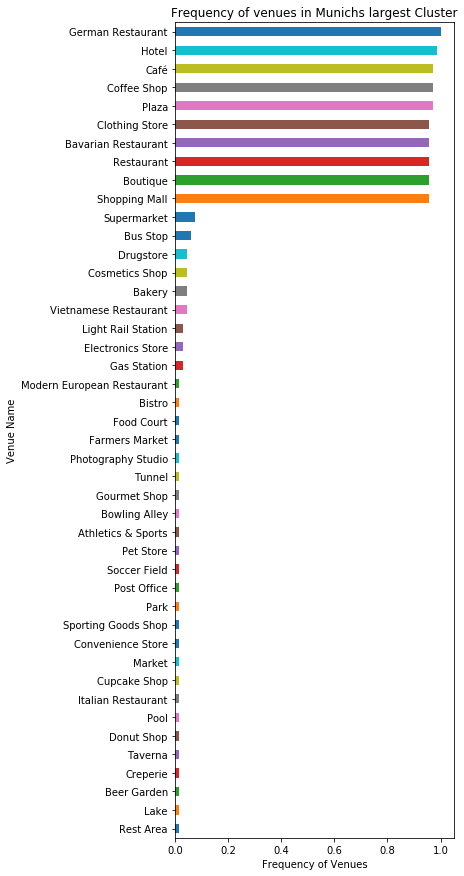

In [50]:
# step 2: plot data
Largest_cluster_Munich2_flat.sort_values(ascending=True).plot(kind='barh', figsize=(5, 15))

plt.xlabel('Frequency of Venues') # add to x-label to the plot
plt.ylabel('Venue Name') # add y-label to the plot
plt.title('Frequency of venues in Munichs largest Cluster') # add title to the plot

plt.show()

In [51]:
url = "https://zipcodes.pscportal.cz/en/zip-code-praha-czech-republic-100335"
time.sleep(1)
print(url)

https://zipcodes.pscportal.cz/en/zip-code-praha-czech-republic-100335


# Download the Dataframe and convert to Pandas


In [52]:
Prague_ZIP = pd.DataFrame(columns=["Neighborhood", "Postalcode"])
Prague_ZIP.drop(Prague_ZIP.index, inplace=True)

url = "https://zipcodes.pscportal.cz/en/zip-code-praha-czech-republic-100335"

data  = requests.get(url).text 
r=requests.get(url)
c=r.content
soup = BeautifulSoup(c, 'html.parser')

for row in soup.find_all("table")[1].find_all("tr"):
    col = row.find_all("td")
    date =col[0].text
    revenue = col[1].text.replace(" ", "")
    
    Prague_ZIP = Prague_ZIP.append({"Neighborhood":date, "Postalcode":revenue}, ignore_index=True)
    


base_url = "https://zipcodes.pscportal.cz/en/zip-code-praha-czech-republic-100335?page="

for page in range(2,7,1):
    #print(base_url+str(page))
    r=requests.get(base_url+str(page))
    c=r.content 
    soup3=BeautifulSoup(c,"html.parser")

    for row in soup3.find_all("table")[1].find_all("tr"):
        col = row.find_all("td")
        date =col[0].text
        revenue = col[1].text.replace(" ", "")

        Prague_ZIP = Prague_ZIP.append({"Neighborhood":date, "Postalcode":revenue}, ignore_index=True).reset_index(drop=True)
    
Prague_ZIP.drop_duplicates()
Prague_ZIP


Neighborhood Postalcode
0                                        Bechovice      19011
1                                           Benice      10300
2                                          Bohnice      18100
3                                           Branik      14000
4                                Brevnov (Praha 6)      16900
5                                       Brezineves      18200
6                                Bubenec (Praha 6)      16000
7                                Bubenec (Praha 7)      17000
8                                         Cakovice      19600
9                                       Cerny Most      19800
10                                          Chodov      14100
11                                       Cholupice      14300
12                                          Cimice      18009
13                                         Dablice      18200
14                                         Dejvice      16000
15                                    Dolni Chabry      18400
16   Dolni Mecholupy (Praha-Dolni Mecholupy) (cast      10200
17                                 Dolni Pocernice      19012
18                                           Dubec      10700
19                                            Haje      10200
20                                           Hajek      10400
21                            Hloubetin (Praha 14)      19800
22                             Hloubetin (Praha 9)      19000
23                                       Hlubocepy      15000
24                                      Hodkovicky      14700
25                            Holesovice (Praha 1)      11800
26                            Holesovice (Praha 7)      17000
27                                          Holyne      15400
28                                 Horni Mecholupy      10200
29                                 Horni Pocernice      19800
..                                             ...        ...
104                            Troja (Praha-Troja)      17100
105                                      Třebonice      15500
106                                    Třeboradice      19600
107                                      Uhříněves      10400
108                                     Veleslavín      16200
109                                  Velká Chuchle      15900
110                            Vinohrady (Praha 1)      11000
111                           Vinohrady (Praha 10)      10000
112                            Vinohrady (Praha 2)      12000
113                            Vinohrady (Praha 3)      13000
114                            Vinohrady (Praha 4)      14000
115                                          Vinoř      19700
116                                       Vokovice      16000
117                            Vršovice (Praha 10)      14000
118                             Vysočany (Praha 3)      13000
119                             Vysočany (Praha 9)      19000
120                                       Vyšehrad      12000
121                                 Zadní Kopanina      15500
122                                       Zbraslav      15600
123                                         Zličín      15500
124                           Záběhlice (Praha 10)      14100
125                            Záběhlice (Praha 4)      14100
126                                          Újezd      14900
127                                 Újezd nad Lesy      19016
128                      Řeporyje (Praha-Řeporyje)      15500
129                                           Řepy      16100
130                                        Šeberov      14900
131                                     Štěrboholy      10200
132                              Žižkov (Praha 10)      10000
133                               Žižkov (Praha 3)      13000

[134 rows x 2 columns]

# Test Geocoder

In [53]:
address = "Kaßberg"

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 50.8324065, 12.9039761.


In [54]:
import geopy
from  geopy.geocoders import Nominatim
nominatim_service = Nominatim(user_agent='X@yy.com') # Important line
geopy.geocoders.options.default_user_agent = "X@yy.com" # Important line
geolocator = Nominatim()

In [55]:
city ="Toronto"
country ="Canada"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)


latitude is :- 43.6534817 
longtitude is:- -79.3839347


In [56]:
location = geolocator.geocode("Toronto, North York, Parkwoods")
print(location.address)
print('')
print((location.latitude, location.longitude))
print('')
print(location.raw)


(43.7587999, -79.3201966)

{'place_id': 124974741, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 160406961, 'boundingbox': ['43.7576231', '43.761106', '-79.3239088', '-79.316215'], 'lat': '43.7587999', 'lon': '-79.3201966', 'display_name': 'Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 2X2, Canada', 'class': 'highway', 'type': 'secondary', 'importance': 0.51}

Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 1Z5, Canada

(43.7611243, -79.3240594)

{'place_id': 126470817, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 160406962, 'boundingbox': ['43.761106', '43.7612191', '-79.3242996', '-79.3239088'], 'lat': '43.7611243', 'lon': '-79.3240594', 'display_name': 'Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 1Z5, Canada', 'class': 'highway', 'type': 'secondary', 'importance': 0.51}


{'place_id': 124974741,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 160406961,
 'boundingbox': ['43.7576231', '43.761106', '-79.3239088', '-79.316215'],
 'lat': '43.7587999',
 'lon': '-79.3201966',
 'display_name': 'Parkwoods Village Drive, Parkway East, Don Valley East, North York, Toronto, Golden Horseshoe, Ontario, M3A 2X2, Canada',
 'class': 'highway',
 'type': 'secondary',
 'importance': 0.51}

# Get the Geodata for the Dataset

In [57]:
locator = Nominatim(user_agent="KapilsGeocoder")
location = locator.geocode("Prague, Czech Republic")
from geopy.extra.rate_limiter import RateLimiter
# PostalCode  Borough  Neighborhood
df_temp=Prague_ZIP.copy()
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df_temp['Address'] = df_temp['Postalcode'].astype(str) + ',' + ' Prague'   
df_temp['Location'] = df_temp['Address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_temp['Point'] = df_temp['Location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
# df_temp[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_temp['Point'].tolist(), index=df_temp.index)
df_temp # get the Get the latitude and the longitude coordinates of each neighborhood obtained

Neighborhood Postalcode        Address  \
0                                        Bechovice      19011  19011, Prague   
1                                           Benice      10300  10300, Prague   
2                                          Bohnice      18100  18100, Prague   
3                                           Branik      14000  14000, Prague   
4                                Brevnov (Praha 6)      16900  16900, Prague   
5                                       Brezineves      18200  18200, Prague   
6                                Bubenec (Praha 6)      16000  16000, Prague   
7                                Bubenec (Praha 7)      17000  17000, Prague   
8                                         Cakovice      19600  19600, Prague   
9                                       Cerny Most      19800  19800, Prague   
10                                          Chodov      14100  14100, Prague   
11                                       Cholupice      14300  14300, Prague   
12                                          Cimice      18009  18009, Prague   
13                                         Dablice      18200  18200, Prague   
14                                         Dejvice      16000  16000, Prague   
15                                    Dolni Chabry      18400  18400, Prague   
16   Dolni Mecholupy (Praha-Dolni Mecholupy) (cast      10200  10200, Prague   
17                                 Dolni Pocernice      19012  19012, Prague   
18                                           Dubec      10700  10700, Prague   
19                                            Haje      10200  10200, Prague   
20                                           Hajek      10400  10400, Prague   
21                            Hloubetin (Praha 14)      19800  19800, Prague   
22                             Hloubetin (Praha 9)      19000  19000, Prague   
23                                       Hlubocepy      15000  15000, Prague   
24                                      Hodkovicky      14700  14700, Prague   
25                            Holesovice (Praha 1)      11800  11800, Prague   
26                            Holesovice (Praha 7)      17000  17000, Prague   
27                                          Holyne      15400  15400, Prague   
28                                 Horni Mecholupy      10200  10200, Prague   
29                                 Horni Pocernice      19800  19800, Prague   
..                                             ...        ...            ...   
104                            Troja (Praha-Troja)      17100  17100, Prague   
105                                      Třebonice      15500  15500, Prague   
106                                    Třeboradice      19600  19600, Prague   
107                                      Uhříněves      10400  10400, Prague   
108                                     Veleslavín      16200  16200, Prague   
109                                  Velká Chuchle      15900  15900, Prague   
110                            Vinohrady (Praha 1)      11000  11000, Prague   
111                           Vinohrady (Praha 10)      10000  10000, Prague   
112                            Vinohrady (Praha 2)      12000  12000, Prague   
113                            Vinohrady (Praha 3)      13000  13000, Prague   
114                            Vinohrady (Praha 4)      14000  14000, Prague   
115                                          Vinoř      19700  19700, Prague   
116                                       Vokovice      16000  16000, Prague   
117                            Vršovice (Praha 10)      14000  14000, Prague   
118                             Vysočany (Praha 3)      13000  13000, Prague   
119                             Vysočany (Praha 9)      19000  19000, Prague   
120                                       Vyšehrad      12000  12000, Prague   
121                                 Zadní Kopanina      15500  15500, Prague   
122                                   

In [58]:
df_temp[['latitude', 'longitude','altitude']] = pd.DataFrame(df_temp['Point'].tolist(), index=df_temp.index)
df_temp# get the Get the latitude and the longitude coordinates of each neighborhood obtained

Neighborhood Postalcode        Address  \
0                                        Bechovice      19011  19011, Prague   
1                                           Benice      10300  10300, Prague   
2                                          Bohnice      18100  18100, Prague   
3                                           Branik      14000  14000, Prague   
4                                Brevnov (Praha 6)      16900  16900, Prague   
5                                       Brezineves      18200  18200, Prague   
6                                Bubenec (Praha 6)      16000  16000, Prague   
7                                Bubenec (Praha 7)      17000  17000, Prague   
8                                         Cakovice      19600  19600, Prague   
9                                       Cerny Most      19800  19800, Prague   
10                                          Chodov      14100  14100, Prague   
11                                       Cholupice      14300  14300, Prague   
12                                          Cimice      18009  18009, Prague   
13                                         Dablice      18200  18200, Prague   
14                                         Dejvice      16000  16000, Prague   
15                                    Dolni Chabry      18400  18400, Prague   
16   Dolni Mecholupy (Praha-Dolni Mecholupy) (cast      10200  10200, Prague   
17                                 Dolni Pocernice      19012  19012, Prague   
18                                           Dubec      10700  10700, Prague   
19                                            Haje      10200  10200, Prague   
20                                           Hajek      10400  10400, Prague   
21                            Hloubetin (Praha 14)      19800  19800, Prague   
22                             Hloubetin (Praha 9)      19000  19000, Prague   
23                                       Hlubocepy      15000  15000, Prague   
24                                      Hodkovicky      14700  14700, Prague   
25                            Holesovice (Praha 1)      11800  11800, Prague   
26                            Holesovice (Praha 7)      17000  17000, Prague   
27                                          Holyne      15400  15400, Prague   
28                                 Horni Mecholupy      10200  10200, Prague   
29                                 Horni Pocernice      19800  19800, Prague   
..                                             ...        ...            ...   
104                            Troja (Praha-Troja)      17100  17100, Prague   
105                                      Třebonice      15500  15500, Prague   
106                                    Třeboradice      19600  19600, Prague   
107                                      Uhříněves      10400  10400, Prague   
108                                     Veleslavín      16200  16200, Prague   
109                                  Velká Chuchle      15900  15900, Prague   
110                            Vinohrady (Praha 1)      11000  11000, Prague   
111                           Vinohrady (Praha 10)      10000  10000, Prague   
112                            Vinohrady (Praha 2)      12000  12000, Prague   
113                            Vinohrady (Praha 3)      13000  13000, Prague   
114                            Vinohrady (Praha 4)      14000  14000, Prague   
115                                          Vinoř      19700  19700, Prague   
116                                       Vokovice      16000  16000, Prague   
117                            Vršovice (Praha 10)      14000  14000, Prague   
118                             Vysočany (Praha 3)      13000  13000, Prague   
119                             Vysočany (Praha 9)      19000  19000, Prague   
120                                       Vyšehrad      12000  12000, Prague   
121                                 Zadní Kopanina      15500  15500, Prague   
122                                   

# Get the Venues Data

In [59]:
CLIENT_ID = "IUMWJPCDEXXLFUWGZHF5EJKWLIM4Q5LY4UGORMZKZ2UAXQJC" # your Foursquare ID
CLIENT_SECRET = 'ZYFMOOUC3KV5DIL5TJTPBALM24QGP3CEM3RUD4NA4R3K03DN' # your Foursquare Secret
ACCESS_TOKEN = 'ONJCT4CDZ5WRBVPM5UF1AQHR23AKSOXS1VM2A0HAC30NCEAZ' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IUMWJPCDEXXLFUWGZHF5EJKWLIM4Q5LY4UGORMZKZ2UAXQJC
CLIENT_SECRET:ZYFMOOUC3KV5DIL5TJTPBALM24QGP3CEM3RUD4NA4R3K03DN


In [60]:
search_query = 'Italian'
radius = 500
print(search_query + ' .... OK!')

Italian .... OK!


In [61]:
print('The dataframe has {} neighborhoods'.format(
        len(df_temp['Neighborhood'].unique()),
        
    )
)

The dataframe has 134 neighborhoods


In [62]:
address = 'Prague'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Prague are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Prague are 50.0874654, 14.4212535.


In [63]:
# create map of New York using latitude and longitude values
map_Prague= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Neighborhood in zip(df_temp['latitude'], df_temp['longitude'], df_temp['Neighborhood']):
    label = '{}, {}'.format(df_temp, Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Prague)  
    
map_Prague

In [64]:
df_temp.loc[1, 'Neighborhood']

'Benice'

In [65]:
df_temp=df_temp.reset_index(drop=True)
df_temp

Neighborhood Postalcode        Address  \
0                                        Bechovice      19011  19011, Prague   
1                                           Benice      10300  10300, Prague   
2                                          Bohnice      18100  18100, Prague   
3                                           Branik      14000  14000, Prague   
4                                Brevnov (Praha 6)      16900  16900, Prague   
5                                       Brezineves      18200  18200, Prague   
6                                Bubenec (Praha 6)      16000  16000, Prague   
7                                Bubenec (Praha 7)      17000  17000, Prague   
8                                         Cakovice      19600  19600, Prague   
9                                       Cerny Most      19800  19800, Prague   
10                                          Chodov      14100  14100, Prague   
11                                       Cholupice      14300  14300, Prague   
12                                          Cimice      18009  18009, Prague   
13                                         Dablice      18200  18200, Prague   
14                                         Dejvice      16000  16000, Prague   
15                                    Dolni Chabry      18400  18400, Prague   
16   Dolni Mecholupy (Praha-Dolni Mecholupy) (cast      10200  10200, Prague   
17                                 Dolni Pocernice      19012  19012, Prague   
18                                           Dubec      10700  10700, Prague   
19                                            Haje      10200  10200, Prague   
20                                           Hajek      10400  10400, Prague   
21                            Hloubetin (Praha 14)      19800  19800, Prague   
22                             Hloubetin (Praha 9)      19000  19000, Prague   
23                                       Hlubocepy      15000  15000, Prague   
24                                      Hodkovicky      14700  14700, Prague   
25                            Holesovice (Praha 1)      11800  11800, Prague   
26                            Holesovice (Praha 7)      17000  17000, Prague   
27                                          Holyne      15400  15400, Prague   
28                                 Horni Mecholupy      10200  10200, Prague   
29                                 Horni Pocernice      19800  19800, Prague   
..                                             ...        ...            ...   
104                            Troja (Praha-Troja)      17100  17100, Prague   
105                                      Třebonice      15500  15500, Prague   
106                                    Třeboradice      19600  19600, Prague   
107                                      Uhříněves      10400  10400, Prague   
108                                     Veleslavín      16200  16200, Prague   
109                                  Velká Chuchle      15900  15900, Prague   
110                            Vinohrady (Praha 1)      11000  11000, Prague   
111                           Vinohrady (Praha 10)      10000  10000, Prague   
112                            Vinohrady (Praha 2)      12000  12000, Prague   
113                            Vinohrady (Praha 3)      13000  13000, Prague   
114                            Vinohrady (Praha 4)      14000  14000, Prague   
115                                          Vinoř      19700  19700, Prague   
116                                       Vokovice      16000  16000, Prague   
117                            Vršovice (Praha 10)      14000  14000, Prague   
118                             Vysočany (Praha 3)      13000  13000, Prague   
119                             Vysočany (Praha 9)      19000  19000, Prague   
120                                       Vyšehrad      12000  12000, Prague   
121                                 Zadní Kopanina      15500  15500, Prague   
122                                   

In [66]:
neighborhood_latitude = df_temp.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df_temp.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df_temp.loc[0, 'Neighborhood'] # neighborhood name

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [67]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '608c6639723e0912410f70bf'},
 'response': {'headerLocation': 'Praha-Bechovice',
  'headerFullLocation': 'Praha-Bechovice, Prague',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 50.085561778803715,
    'lng': 14.619818025808899},
   'sw': {'lat': 50.07656176980371, 'lng': 14.605819022282889}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4df7a3a9a809a581cfda21c1',
       'name': 'Sportovní a dětské hřiště Běchovice',
       'location': {'lat': 50.08176916732521,
        'lng': 14.614555558244072,
        'labeledLatLngs': [{'label': 'display',
          'lat': 50.08176916732521,
          'lng': 14.614555558244072}],
        'distance': 146,
        'cc': 'CZ',
        'city'

In [68]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [69]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name         categories        lat  \
0        Sportovní a dětské hřiště Běchovice         Playground  50.081769   
1  Pomník běžeckého závodu Běchovice - Praha  Outdoor Sculpture  50.081315   
2                             Pizza Delicato        Pizza Place  50.081615   
3                          Dammas Steakhouse         Steakhouse  50.081203   
4                            Běchovický dvůr         Restaurant  50.081123   

         lng  
0  14.614556  
1  14.615105  
2  14.615391  
3  14.616907  
4  14.617203

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [71]:
prague_venues = getNearbyVenues(names=df_temp['Neighborhood'],
                                   latitudes=df_temp['latitude'],
                                   longitudes=df_temp['longitude']
                                  )

Bechovice
Benice
Bohnice
Branik
Brevnov (Praha 6)
Brezineves
Bubenec (Praha 6)
Bubenec (Praha 7)
Cakovice
Cerny Most
Chodov
Cholupice
Cimice
Dablice
Dejvice
Dolni Chabry
Dolni Mecholupy (Praha-Dolni Mecholupy) (cast
Dolni Pocernice
Dubec
Haje
Hajek
Hloubetin (Praha 14)
Hloubetin (Praha 9)
Hlubocepy
Hodkovicky
Holesovice (Praha 1)
Holesovice (Praha 7)
Holyne
Horni Mecholupy
Horni Pocernice
Hostavice
Hostivar
Hradcany (Praha 1)
Hradcany (Praha 6)
Hrdlorezy (Praha 9)
Jinonice (Praha 13)
Jinonice (Praha 5)
Josefov
Kamyk
Karlin
Kbely
Klanovice
Kobylisy
Kolodeje
Kolovraty
Komorany
Kosire
Kralovice
Krc
Kreslice
Kunratice
Kyje
Lahovice
Letnany
Lhotka
Liben (Praha 8)
Liben (Praha 9)
Liboc
Libus
Lipany
Lipence
Lochkov
Lysolaje
Mala Chuchle
Mala Strana (Praha 1)
Mala Strana (Praha 5)
Malesice
Michle (Praha 10)
Michle (Praha 4)
Miskovice
Modrany
Motol
Nebusice
Nedvezi
Nové Město (Praha 1)
Nové Město (Praha 2)
Nové Město (Praha 8)
Nusle (Praha 2)
Nusle (Praha 4)
Petrovice
Pitkovice (Praha 22)
Podol

In [72]:
prague_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                           
Bechovice                                                         10   
Benice                                                            14   
Bohnice                                                           78   
Branik                                                            78   
Brevnov (Praha 6)                                                 78   
Brezineves                                                        78   
Bubenec (Praha 6)                                                 78   
Bubenec (Praha 7)                                                 78   
Cakovice                                                          12   
Cerny Most                                                         5   
Chodov                                                            78   
Cholupice                                                         78   
Cimice                                                            16   
Dablice                                                           78   
Dejvice                                                           78   
Dolni Chabry                                                      78   
Dolni Mecholupy (Praha-Dolni Mecholupy) (cast                     51   
Dolni Pocernice                                                   21   
Dubec                                                              6   
Haje                                                              51   
Hajek                                                             16   
Hloubetin (Praha 14)                                               5   
Hloubetin (Praha 9)                                               78   
Hlubocepy                                                         78   
Hodkovicky                                                        78   
Holesovice (Praha 1)                                              78   
Holesovice (Praha 7)                                              78   
Holyne                                                            78   
Horni Mecholupy                                                   51   
Horni Pocernice                                                    5   
...                                                              ...   
Troja (Praha-Troja)                                               78   
Třebonice                                                         15   
Třeboradice                                                       12   
Uhříněves                                                         16   
Veleslavín                                                        78   
Velká Chuchle                                                     78   
Vinohrady (Praha 1)                                               78   
Vinohrady (Praha 10)                                              78   
Vinohrady (Praha 2)                                               78   
Vinohrady (Praha 3)                                               78   
Vinohrady (Praha 4)                                               78   
Vinoř                                                             12   
Vokovice                                                          78   
Vršovice (Praha 10)                                               78   
Vysočany (Praha 3)                                                78   
Vysočany (Praha 9)                                                78   
Vyšehrad                                                          78   
Zadní Kopanina                                                    15   
Zbraslav                                                          16   
Zličín                                                            15   
Záběhlice (Praha 10)                                              78   
Záběhlice (Praha 4)                                               78   
Újezd                                                             51   
Újezd nad Lesy 

In [73]:
print(prague_venues.shape)
prague_venues.head()

(7698, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Bechovice              50.081062               14.612819   
1    Bechovice              50.081062               14.612819   
2    Bechovice              50.081062               14.612819   
3    Bechovice              50.081062               14.612819   
4    Bechovice              50.081062               14.612819   

                                       Venue  Venue Latitude  Venue Longitude  \
0        Sportovní a dětské hřiště Běchovice       50.081769        14.614556   
1  Pomník běžeckého závodu Běchovice - Praha       50.081315        14.615105   
2                             Pizza Delicato       50.081615        14.615391   
3                          Dammas Steakhouse       50.081203        14.616907   
4                            Běchovický dvůr       50.081123        14.617203   

      Venue Category  
0         Playground  
1  Outdoor Sculpture  
2        Pizza Place  
3         Steakhouse  
4         Restaurant

In [74]:
print('There are {} uniques categories.'.format(len(prague_venues['Venue Category'].unique())))

There are 121 uniques categories.


# Analyze Each Neighborhood

In [75]:
# one hot encoding
prague_onehot = pd.get_dummies(prague_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
prague_onehot['Neighborhood'] = prague_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [prague_onehot.columns[-1]] + list(prague_onehot.columns[:-1])
prague_onehot = prague_onehot[fixed_columns]

prague_onehot.head()


Neighborhood  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0    Bechovice           0                    0                 0   
1    Bechovice           0                    0                 0   
2    Bechovice           0                    0                 0   
3    Bechovice           0                    0                 0   
4    Bechovice           0                    0                 0   

   Athletics & Sports  BBQ Joint  Baby Store  Bakery  Bar  Basketball Court  \
0                   0          0           0       0    0                 0   
1                   0          0           0       0    0                 0   
2                   0          0           0       0    0                 0   
3                   0          0           0       0    0                 0   
4                   0          0           0       0    0                 0   

      ...       Tree  Used Bookstore  Vegetarian / Vegan Restaurant  \
0     ...          0               0                              0   
1     ...          0               0                              0   
2     ...          0               0                              0   
3     ...          0               0                              0   
4     ...          0               0                              0   

   Vehicle Inspection Station  Video Game Store  Vietnamese Restaurant  \
0                           0                 0                      0   
1                           0                 0                      0   
2                           0                 0                      0   
3                           0                 0                      0   
4                           0                 0                      0   

   Warehouse Store  Wine Bar  Wine Shop  Yoga Studio  
0                0         0          0            0  
1                0         0          0            0  
2                0         0          0            0  
3                0         0          0            0  
4                0         0          0            0  

[5 rows x 122 columns]

In [76]:
prague_onehot.shape

(7698, 122)

In [77]:
prague_grouped = prague_onehot.groupby('Neighborhood').mean().reset_index()
prague_grouped


Neighborhood  Art Museum  \
0                                        Bechovice    0.000000   
1                                           Benice    0.000000   
2                                          Bohnice    0.012821   
3                                           Branik    0.012821   
4                                Brevnov (Praha 6)    0.012821   
5                                       Brezineves    0.012821   
6                                Bubenec (Praha 6)    0.012821   
7                                Bubenec (Praha 7)    0.012821   
8                                         Cakovice    0.000000   
9                                       Cerny Most    0.000000   
10                                          Chodov    0.012821   
11                                       Cholupice    0.012821   
12                                          Cimice    0.000000   
13                                         Dablice    0.012821   
14                                         Dejvice    0.012821   
15                                    Dolni Chabry    0.012821   
16   Dolni Mecholupy (Praha-Dolni Mecholupy) (cast    0.000000   
17                                 Dolni Pocernice    0.000000   
18                                           Dubec    0.000000   
19                                            Haje    0.000000   
20                                           Hajek    0.000000   
21                            Hloubetin (Praha 14)    0.000000   
22                             Hloubetin (Praha 9)    0.012821   
23                                       Hlubocepy    0.012821   
24                                      Hodkovicky    0.012821   
25                            Holesovice (Praha 1)    0.012821   
26                            Holesovice (Praha 7)    0.012821   
27                                          Holyne    0.012821   
28                                 Horni Mecholupy    0.000000   
29                                 Horni Pocernice    0.000000   
..                                             ...         ...   
104                            Troja (Praha-Troja)    0.012821   
105                                      Třebonice    0.000000   
106                                    Třeboradice    0.000000   
107                                      Uhříněves    0.000000   
108                                     Veleslavín    0.012821   
109                                  Velká Chuchle    0.012821   
110                            Vinohrady (Praha 1)    0.012821   
111                           Vinohrady (Praha 10)    0.012821   
112                            Vinohrady (Praha 2)    0.012821   
113                            Vinohrady (Praha 3)    0.012821   
114                            Vinohrady (Praha 4)    0.012821   
115                                          Vinoř    0.000000   
116                                       Vokovice    0.012821   
117                            Vršovice (Praha 10)    0.012821   
118                             Vysočany (Praha 3)    0.012821   
119                             Vysočany (Praha 9)    0.012821   
120                                       Vyšehrad    0.012821   
121                                 Zadní Kopanina    0.000000   
122                                       Zbraslav    0.000000   
123                                         Zličín    0.000000   
124                           Záběhlice (Praha 10)    0.012821   
125                            Záběhlice (Praha 4)    0.012821   
126                                          Újezd    0.000000   
127                                 Újezd nad Lesy    0.000000   
128                      Řeporyje (Praha-Řeporyje)    0.000000   
129                                           Řepy    0.000000   
130                                        Šeberov    0.000000   
131                                     Štěrboholy    0.000000   
132                              Žižkov (Praha 10)    0.012821   
133         

In [78]:
prague_grouped.shape

(134, 122)

In [79]:
num_top_venues = 5

for hood in prague_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = prague_grouped[prague_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Bechovice----
               venue  freq
0  Outdoor Sculpture   0.1
1         Steakhouse   0.1
2         Restaurant   0.1
3         Playground   0.1
4       Soccer Field   0.1


----Benice----
                venue  freq
0            Bus Stop  0.14
1               Trail  0.14
2  Italian Restaurant  0.07
3       Grocery Store  0.07
4                 Pub  0.07


----Bohnice----
                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel  0.06
3  Italian Restaurant  0.06
4               Plaza  0.05


----Branik----
                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel  0.06
3  Italian Restaurant  0.06
4               Plaza  0.05


----Brevnov (Praha 6)----
                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel  0.06
3  Italian Restaurant  0.06
4               Plaza  0.05


----Brezineves----
                venue  freq
0                Ca

                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel  0.06
3  Italian Restaurant  0.06
4               Plaza  0.05


----Kreslice----
              venue  freq
0  Czech Restaurant  0.12
1              Café  0.12
2             Plaza  0.06
3       Supermarket  0.06
4     Train Station  0.06


----Kunratice----
                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel  0.06
3  Italian Restaurant  0.06
4               Plaza  0.05


----Kyje----
            venue  freq
0  Scenic Lookout   0.2
1   Bowling Alley   0.2
2       Reservoir   0.2
3        Bus Stop   0.2
4  Shop & Service   0.2


----Lahovice----
                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel  0.06
3  Italian Restaurant  0.06
4               Plaza  0.05


----Letnany----
                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel

                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel  0.06
3  Italian Restaurant  0.06
4               Plaza  0.05


----Stodůlky (Praha-Řeporyje)----
                  venue  freq
0    Chinese Restaurant  0.07
1        Used Bookstore  0.07
2  Fast Food Restaurant  0.07
3           Flower Shop  0.07
4            Restaurant  0.07


----Strašnice (Praha 10)----
                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel  0.06
3  Italian Restaurant  0.06
4               Plaza  0.05


----Strašnice (Praha 3)----
                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel  0.06
3  Italian Restaurant  0.06
4               Plaza  0.05


----Střešovice----
                venue  freq
0                Café  0.09
1          Restaurant  0.08
2               Hotel  0.06
3  Italian Restaurant  0.06
4               Plaza  0.05


----Střížkov (Praha 8)----
 

In [80]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [81]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = prague_grouped['Neighborhood']

for ind in np.arange(prague_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(prague_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          Bechovice           Pizza Place     Food & Drink Shop   
1             Benice              Bus Stop                 Trail   
2            Bohnice                  Café            Restaurant   
3             Branik                  Café            Restaurant   
4  Brevnov (Praha 6)                  Café            Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Playground            Steakhouse     Outdoor Sculpture   
1             Reservoir            Restaurant          Tennis Court   
2                 Hotel    Italian Restaurant                 Plaza   
3                 Hotel    Italian Restaurant                 Plaza   
4                 Hotel    Italian Restaurant                 Plaza   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0              Bus Stop         Train Station          Soccer Field   
1     Food & Drink Shop      Basketball Court         Train Station   
2                   Pub         Historic Site          Cocktail Bar   
3                   Pub         Historic Site          Cocktail Bar   
4                   Pub         Historic Site          Cocktail Bar   

  9th Most Common Venue 10th Most Common Venue  
0            Restaurant              Disc Golf  
1    Italian Restaurant                    Pub  
2      Czech Restaurant               Boutique  
3      Czech Restaurant               Boutique  
4      Czech Restaurant               Boutique

# Cluster Neighborhoods

In [82]:
# set number of clusters
kclusters = 5

prague_grouped_clustering = prague_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(prague_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 



array([0, 0, 1, 1, 1, 1, 1, 1, 0, 2])

In [83]:
neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue  \
0                                        Bechovice           Pizza Place   
1                                           Benice              Bus Stop   
2                                          Bohnice                  Café   
3                                           Branik                  Café   
4                                Brevnov (Praha 6)                  Café   
5                                       Brezineves                  Café   
6                                Bubenec (Praha 6)                  Café   
7                                Bubenec (Praha 7)                  Café   
8                                         Cakovice              Bus Stop   
9                                       Cerny Most             Reservoir   
10                                          Chodov                  Café   
11                                       Cholupice                  Café   
12                                          Cimice              Bus Stop   
13                                         Dablice                  Café   
14                                         Dejvice                  Café   
15                                    Dolni Chabry                  Café   
16   Dolni Mecholupy (Praha-Dolni Mecholupy) (cast                  Park   
17                                 Dolni Pocernice              Bus Stop   
18                                           Dubec              Bus Stop   
19                                            Haje                  Park   
20                                           Hajek                  Café   
21                            Hloubetin (Praha 14)             Reservoir   
22                             Hloubetin (Praha 9)                  Café   
23                                       Hlubocepy                  Café   
24                                      Hodkovicky                  Café   
25                            Holesovice (Praha 1)                  Café   
26                            Holesovice (Praha 7)                  Café   
27                                          Holyne                  Café   
28                                 Horni Mecholupy                  Park   
29                                 Horni Pocernice             Reservoir   
..                                             ...                   ...   
104                            Troja (Praha-Troja)                  Café   
105                                      Třebonice            Restaurant   
106                                    Třeboradice              Bus Stop   
107                                      Uhříněves                  Café   
108                                     Veleslavín                  Café   
109                                  Velká Chuchle                  Café   
110                            Vinohrady (Praha 1)                  Café   
111                           Vinohrady (Praha 10)                  Café   
112                            Vinohrady (Praha 2)                  Café   
113                            Vinohrady (Praha 3)                  Café   
114                            Vinohrady (Praha 4)                  Café   
115                                          Vinoř            Restaurant   
116                                       Vokovice                  Café   
117                            Vršovice (Praha 10)                  Café   
118                             Vysočany (Praha 3)                  Café   
119                             Vysočany (Praha 9)                  Café   
120                                       Vyšehrad                  Café   
121                                 Zadní Kopanina            Restaurant   
122                                       Zbraslav                   Pub   
123                                         Zličín            Restaurant   
124                           Záběhlice (Praha 10)                  Café   
125       

In [84]:

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

prague_merged = df_temp

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
prague_merged = prague_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

prague_merged.head() # check the last columns!



Neighborhood Postalcode        Address  \
0          Bechovice      19011  19011, Prague   
1             Benice      10300  10300, Prague   
2            Bohnice      18100  18100, Prague   
3             Branik      14000  14000, Prague   
4  Brevnov (Praha 6)      16900  16900, Prague   

                                            Location  \
0  (Běchovice, Hlavní město Praha, Praha, 19011, ...   
1  (Kolovraty, Hlavní město Praha, Praha, 10300, ...   
2  (Hlavní město Praha, Praha, Česko, (50.0874654...   
3  (Hlavní město Praha, Praha, Česko, (50.0874654...   
4  (Hlavní město Praha, Praha, Česko, (50.0874654...   

                                           Point   latitude  longitude  \
0   (50.08106177430371, 14.612818524045894, 0.0)  50.081062  14.612819   
1  (50.012999887093024, 14.623781607613104, 0.0)  50.013000  14.623782   
2                  (50.0874654, 14.4212535, 0.0)  50.087465  14.421254   
3                  (50.0874654, 14.4212535, 0.0)  50.087465  14.421254   
4                  (50.0874654, 14.4212535, 0.0)  50.087465  14.421254   

   altitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0       0.0               0           Pizza Place     Food & Drink Shop   
1       0.0               0              Bus Stop                 Trail   
2       0.0               1                  Café            Restaurant   
3       0.0               1                  Café            Restaurant   
4       0.0               1                  Café            Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Playground            Steakhouse     Outdoor Sculpture   
1             Reservoir            Restaurant          Tennis Court   
2                 Hotel    Italian Restaurant                 Plaza   
3                 Hotel    Italian Restaurant                 Plaza   
4                 Hotel    Italian Restaurant                 Plaza   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0              Bus Stop         Train Station          Soccer Field   
1     Food & Drink Shop      Basketball Court         Train Station   
2                   Pub         Historic Site          Cocktail Bar   
3                   Pub         Historic Site          Cocktail Bar   
4                   Pub         Historic Site          Cocktail Bar   

  9th Most Common Venue 10th Most Common Venue  
0            Restaurant              Disc Golf  
1    Italian Restaurant                    Pub  
2      Czech Restaurant               Boutique  
3      Czech Restaurant               Boutique  
4      Czech Restaurant               Boutique

In [85]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(prague_merged['latitude'], prague_merged['longitude'], prague_merged['Neighborhood'], prague_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



In [86]:
C0=prague_merged.loc[prague_merged['Cluster Labels'] == 0, prague_merged.columns[[1] + list(range(5, prague_merged.shape[1]))]]



In [87]:
C1=prague_merged.loc[prague_merged['Cluster Labels'] == 1, prague_merged.columns[[1] + list(range(5, prague_merged.shape[1]))]]



In [88]:
C2=prague_merged.loc[prague_merged['Cluster Labels'] == 2, prague_merged.columns[[1] + list(range(5, prague_merged.shape[1]))]]



In [89]:
C3=prague_merged.loc[prague_merged['Cluster Labels'] == 3, prague_merged.columns[[1] + list(range(5, prague_merged.shape[1]))]]


In [90]:
C4=prague_merged.loc[prague_merged['Cluster Labels'] == 4, prague_merged.columns[[1] + list(range(5, prague_merged.shape[1]))]]



In [91]:
C0i=len(C0.index)    
C1i=len(C1.index)       
C2i=len(C2.index)       
C3i=len(C3.index)       
C4i=len(C4.index)       

In [92]:
prague_clusters_index=pd.DataFrame([['C0', C0i], ['C1', C1i], ['C2', C2i], ['C3', C3i], ['C4', C4i]], columns = ['Cluster', 'Venues'])
prague_clusters_index

Cluster  Venues
0      C0      22
1      C1     101
2      C2       5
3      C3       5
4      C4       1

# Select the Largest Cluster which represents the City

In [93]:
Largest_cluster_Prague2=locals()[("C"+str(prague_clusters_index["Venues"].idxmax()))].drop(['Postalcode','latitude','longitude','altitude','Cluster Labels'], axis=1) 
Largest_cluster_Prague2

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
2                    Café            Restaurant                 Hotel   
3                    Café            Restaurant                 Hotel   
4                    Café            Restaurant                 Hotel   
5                    Café            Restaurant                 Hotel   
6                    Café            Restaurant                 Hotel   
7                    Café            Restaurant                 Hotel   
10                   Café            Restaurant                 Hotel   
11                   Café            Restaurant                 Hotel   
13                   Café            Restaurant                 Hotel   
14                   Café            Restaurant                 Hotel   
15                   Café            Restaurant                 Hotel   
16                   Park            Restaurant         Grocery Store   
19                   Park            Restaurant         Grocery Store   
20                   Café      Czech Restaurant         Train Station   
22                   Café            Restaurant                 Hotel   
23                   Café            Restaurant                 Hotel   
24                   Café            Restaurant                 Hotel   
25                   Café            Restaurant                 Hotel   
26                   Café            Restaurant                 Hotel   
27                   Café            Restaurant                 Hotel   
28                   Park            Restaurant         Grocery Store   
31                   Park            Restaurant         Grocery Store   
32                   Café            Restaurant                 Hotel   
33                   Café            Restaurant                 Hotel   
34                   Café            Restaurant                 Hotel   
35                   Café            Restaurant                 Hotel   
36                   Café            Restaurant                 Hotel   
37                   Café            Restaurant                 Hotel   
38                   Café            Restaurant                 Hotel   
39                   Café            Restaurant                 Hotel   
..                    ...                   ...                   ...   
94                   Café            Restaurant                 Hotel   
96                   Café            Restaurant                 Hotel   
97                   Café            Restaurant                 Hotel   
98                   Café            Restaurant                 Hotel   
99                   Café            Restaurant                 Hotel   
100                  Café            Restaurant                 Hotel   
101                  Café            Restaurant                 Hotel   
102                  Café            Restaurant                 Hotel   
103                  Café            Restaurant                 Hotel   
104                  Café            Restaurant                 Hotel   
107                  Café      Czech Restaurant         Train Station   
108                  Café            Restaurant                 Hotel   
109                  Café            Restaurant                 Hotel   
110                  Café            Restaurant                 Hotel   
111                  Café            Restaurant                 Hotel   
112                  Café            Restaurant                 Hotel   
113                  Café            Restaurant                 Hotel   
114                  Café            Restaurant                 Hotel   
116                  Café            Restaurant                 Hotel   
117                  Café            Restaurant                 Hotel   
118                  Café            Restaurant                 Hotel   
119                  Café            Restaurant                 Hotel   
120                  Café            Restaurant               

In [94]:
# Sort The Most Common Values

In [95]:
Largest_cluster_Prague2_flat=pd.value_counts(Largest_cluster_Prague2.values.flatten())
Largest_cluster_Prague2_flat=Largest_cluster_Prague2_flat.divide(Largest_cluster_Prague2_flat.max()) 
Largest_cluster_Prague2_flat

Café                        1.000000
Restaurant                  0.940594
Pub                         0.940594
Plaza                       0.920792
Czech Restaurant            0.920792
Boutique                    0.871287
Italian Restaurant          0.871287
Hotel                       0.871287
Historic Site               0.871287
Cocktail Bar                0.871287
Vietnamese Restaurant       0.118812
Dessert Shop                0.079208
Gastropub                   0.069307
Grocery Store               0.069307
Park                        0.069307
Pizza Place                 0.069307
Bar                         0.069307
Motorcycle Shop             0.049505
BBQ Joint                   0.049505
Asian Restaurant            0.049505
Train Station               0.049505
Supermarket                 0.049505
Bus Stop                    0.049505
Farmers Market              0.009901
Tennis Court                0.009901
Movie Theater               0.009901
Playground                  0.009901
M

# Create a Bar Chart

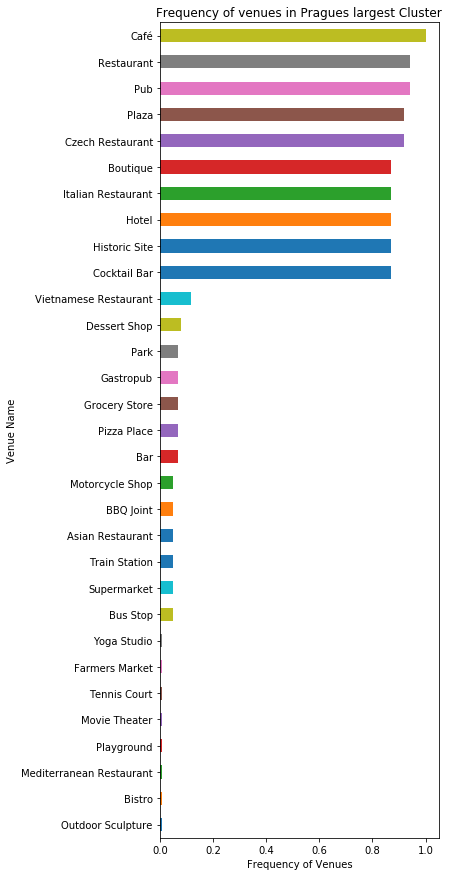

In [96]:
# step 2: plot data
Largest_cluster_Prague2_flat.sort_values(ascending=True).plot(kind='barh', figsize=(5, 15))

plt.xlabel('Frequency of Venues') # add to x-label to the plot
plt.ylabel('Venue Name') # add y-label to the plot
plt.title('Frequency of venues in Pragues largest Cluster') # add title to the plot

plt.show()

In [97]:

Largest_cluster_Prague2_flat_df = Largest_cluster_Prague2_flat.to_frame()
Largest_cluster_Prague2_flat_df.columns=["Prague"]

Largest_cluster_Munich2_flat_df = Largest_cluster_Munich2_flat.to_frame()
Largest_cluster_Munich2_flat_df.columns=["Munich"]


# Join the data from Prague and Munich in one Dataset

In [98]:
Largest_cluster_Prague_Munich_flat_df=Largest_cluster_Prague2_flat_df.join(Largest_cluster_Munich2_flat_df, how="outer")
Largest_cluster_Prague_Munich_flat_df

Prague    Munich
Asian Restaurant            0.049505       NaN
Athletics & Sports               NaN  0.014925
BBQ Joint                   0.049505       NaN
Bakery                           NaN  0.044776
Bar                         0.069307       NaN
Bavarian Restaurant              NaN  0.955224
Beer Garden                      NaN  0.014925
Bistro                      0.009901  0.014925
Boutique                    0.871287  0.955224
Bowling Alley                    NaN  0.014925
Bus Stop                    0.049505  0.059701
Café                        1.000000  0.970149
Clothing Store                   NaN  0.955224
Cocktail Bar                0.871287       NaN
Coffee Shop                      NaN  0.970149
Convenience Store                NaN  0.014925
Cosmetics Shop                   NaN  0.044776
Creperie                         NaN  0.014925
Cupcake Shop                     NaN  0.014925
Czech Restaurant            0.920792       NaN
Dessert Shop                0.079208       NaN
Donut Shop                       NaN  0.014925
Drugstore                        NaN  0.044776
Electronics Store                NaN  0.029851
Farmers Market              0.009901  0.014925
Food Court                       NaN  0.014925
Gas Station                      NaN  0.029851
Gastropub                   0.069307       NaN
German Restaurant                NaN  1.000000
Gourmet Shop                     NaN  0.014925
...                              ...       ...
Italian Restaurant          0.871287  0.014925
Lake                             NaN  0.014925
Light Rail Station               NaN  0.029851
Market                           NaN  0.014925
Mediterranean Restaurant    0.009901       NaN
Modern European Restaurant       NaN  0.014925
Motorcycle Shop             0.049505       NaN
Movie Theater               0.009901       NaN
Outdoor Sculpture           0.009901       NaN
Park                        0.069307  0.014925
Pet Store                        NaN  0.014925
Photography Studio               NaN  0.014925
Pizza Place                 0.069307       NaN
Playground                  0.009901       NaN
Plaza                       0.920792  0.970149
Pool                             NaN  0.014925
Post Office                      NaN  0.014925
Pub                         0.940594       NaN
Rest Area                        NaN  0.014925
Restaurant                  0.940594  0.955224
Shopping Mall                    NaN  0.955224
Soccer Field                     NaN  0.014925
Sporting Goods Shop              NaN  0.014925
Supermarket                 0.049505  0.074627
Taverna                          NaN  0.014925
Tennis Court                0.009901       NaN
Train Station               0.049505       NaN
Tunnel                           NaN  0.014925
Vietnamese Restaurant       0.118812  0.044776
Yoga Studio                 0.009901       NaN

[63 rows x 2 columns]

# Visualize the Common Data 

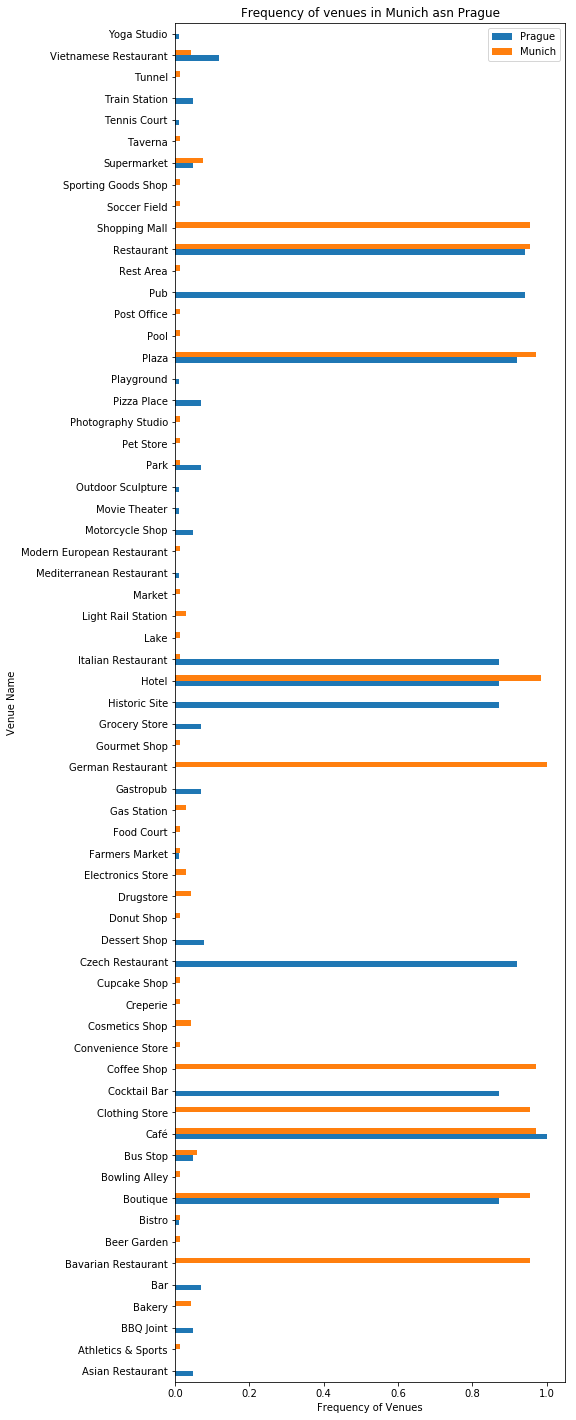

In [99]:
# step 2: plot data
Largest_cluster_Prague_Munich_flat_df.plot(kind='barh', figsize=(7, 25))

plt.xlabel('Frequency of Venues') # add to x-label to the plot
plt.ylabel('Venue Name') # add y-label to the plot
plt.title('Frequency of venues in Munich asn Prague') # add title to the plot

plt.show()

In [100]:
Largest_cluster_Prague_Munich_flat_df=Largest_cluster_Prague_Munich_flat_df.dropna()
Largest_cluster_Prague_Munich_flat_df

Prague    Munich
Bistro                 0.009901  0.014925
Boutique               0.871287  0.955224
Bus Stop               0.049505  0.059701
Café                   1.000000  0.970149
Farmers Market         0.009901  0.014925
Hotel                  0.871287  0.985075
Italian Restaurant     0.871287  0.014925
Park                   0.069307  0.014925
Plaza                  0.920792  0.970149
Restaurant             0.940594  0.955224
Supermarket            0.049505  0.074627
Vietnamese Restaurant  0.118812  0.044776

# Visualize the Common Comparison Data 

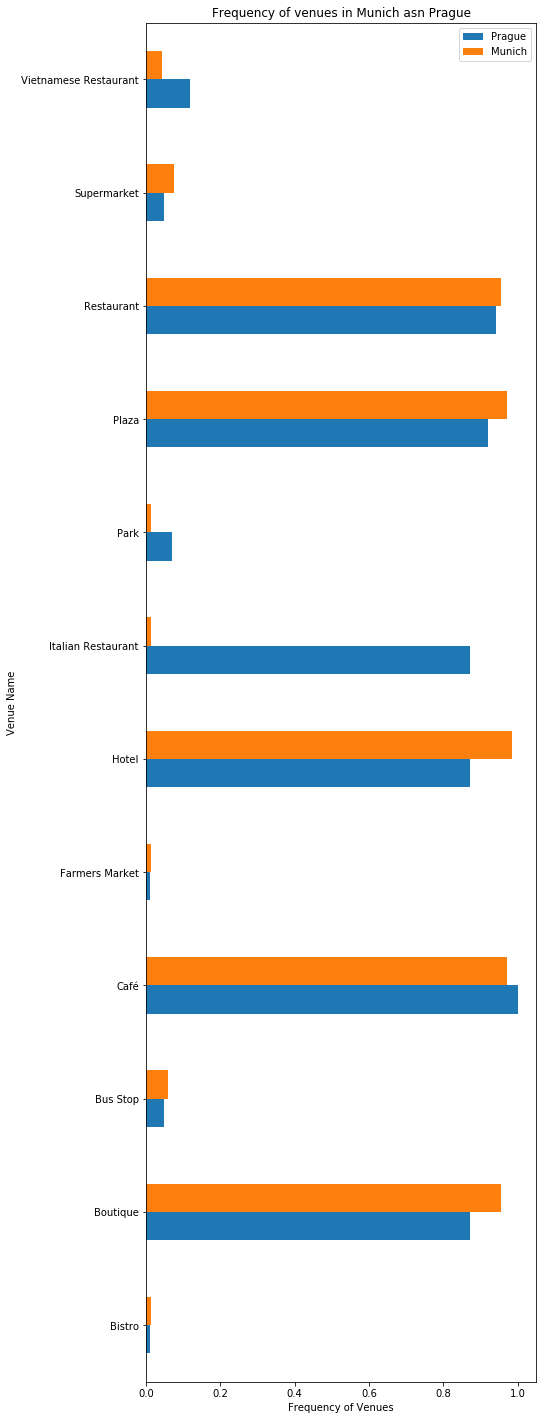

In [101]:
# step 2: plot data
Largest_cluster_Prague_Munich_flat_df.plot(kind='barh', figsize=(7, 25))

plt.xlabel('Frequency of Venues') # add to x-label to the plot
plt.ylabel('Venue Name') # add y-label to the plot
plt.title('Frequency of venues in Munich asn Prague') # add title to the plot

plt.show()